In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2
from scipy.spatial import distance

Using TensorFlow backend.


In [2]:
from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential
import tensorflow as tf

In [9]:
from os import listdir

In [30]:
def vector_feature(img, basemodel):
    img1 = np.resize(img, (224, 224, 3))
    feature_vector = basemodel.predict(img1.reshape(1, 224, 224, 3))
    return feature_vector

In [11]:
def cosine_simil(vector1, vector2):
    return 1 - distance.cosine(vector1, vector2)

In [45]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights="imagenet", input_shape=(224, 224, 3), pooling="max")

vgg19 = keras.applications.vgg19.VGG19(include_top=True, weights="imagenet", input_shape=(224, 224, 3), pooling="max")

574717952/574710816 [==============================] - 176s 0us/step


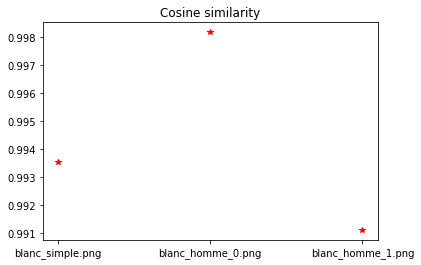

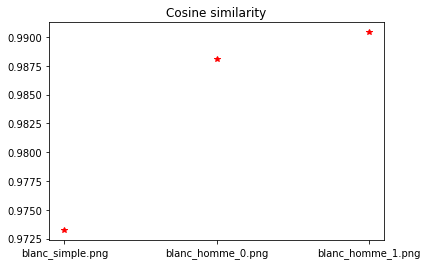

NameError: name 'vgg19' is not defined

In [43]:
def comparison(img_comparison, bib_val, network, layer, dist):#, network, distance, basemodel):
    
    raw_val = [img for img in listdir(bib_val)]
    pict_val = [plt.imread(bib_val + "/" +pict) for pict in raw_val]
    basemodel = Model(inputs = network.input, outputs = layer)
    vect_ini = vector_feature(img_comparison, basemodel)
    Y_dist = []
    for i in pict_val:
        vect_comp = vector_feature(i, basemodel)
        Y_dist.append(dist(vect_comp, vect_ini))
        
    plt.plot(raw_val, Y_dist, "r*")
    plt.title("Cosine similarity")
    plt.show()

#vgg16
img = plt.imread("phone/blanc.png")    
comparison(img, "blanc_jumia", vgg16, vgg16.get_layer("fc2").output, cosine_simil)

img = plt.imread("phone/blanc_tournee.png")    
comparison(img, "blanc_jumia", vgg16, vgg16.get_layer("fc2").output, cosine_simil)

#vgg19
img = plt.imread("phone/blanc.png")    
comparison(img, "blanc_jumia", vgg19, vgg19.get_layer("fc2").output, cosine_simil)

img = plt.imread("phone/blanc_tournee.png")    
comparison(img, "blanc_jumia", vgg19, vgg19.get_layer("fc2").output, cosine_simil)

In [54]:
img1 = cv2.imread("t_s_0.png")
img2 = cv2.imread("t_s_1.png")
img3 = cv2.imread("t_s_2.png")
img4 = cv2.imread("t_s_3.png")

0.9197923541069031
0.6399257183074951


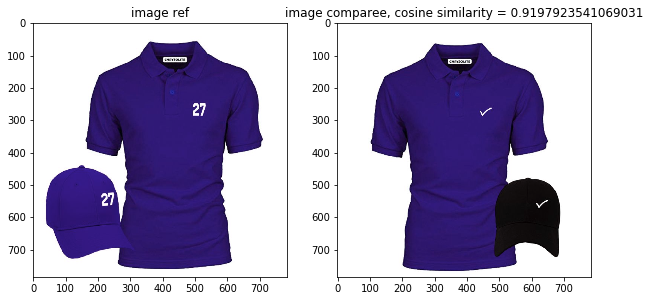

In [55]:
f1 = get_feature_vector(img1)
f2 = get_feature_vector(img2)
f3 = get_feature_vector(img3)
f4 = get_feature_vector(img4)


plt.figure(figsize = (10,8))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap="Greys_r")
plt.title("image ref")

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap="Greys_r")
plt.title("image comparee, cosine similarity = " + str(calculate_similarity(f1, f2)))


print(calculate_similarity(f1, f2))
print(calculate_similarity(f1, f3))

Text(0.5, 1.0, 'image comparee, cosine similarity = 0.6399257183074951')

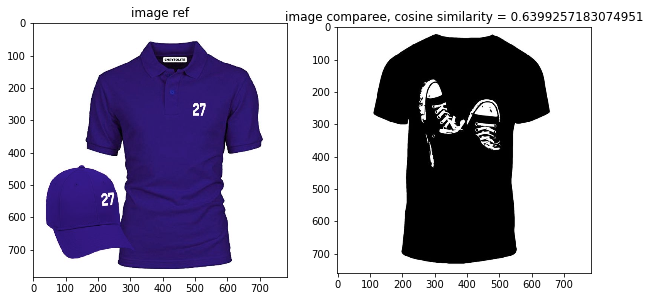

In [52]:
plt.figure(figsize = (10,8))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap="Greys_r")
plt.title("image ref")

plt.subplot(1, 2, 2)
plt.imshow(img3, cmap="Greys_r")
plt.title("image comparee, cosine similarity = " + str(calculate_similarity(f1, f3)))

Text(0.5, 1.0, 'image comparee, cosine similarity = 0.5727011561393738')

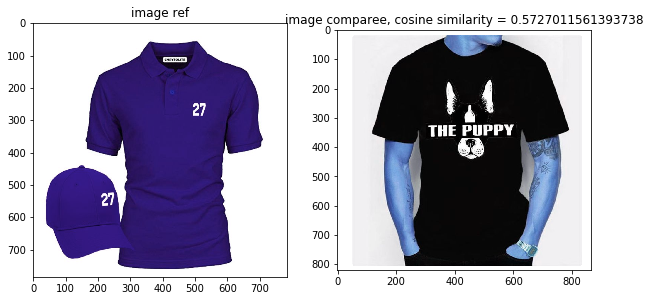

In [56]:
plt.figure(figsize = (10,8))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap="Greys_r")
plt.title("image ref")

plt.subplot(1, 2, 2)
plt.imshow(img4, cmap="Greys_r")
plt.title("image comparee, cosine similarity = " + str(calculate_similarity(f1, f4)))